In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Let's read the data 🕵🏻‍♂️

In [31]:
ufo_df = pd.read_csv('./data/scrubbed.csv', error_bad_lines=False, low_memory=False)

In [32]:
%store ufo_df
ufo_df.info()

Stored 'ufo_df' (DataFrame)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


### Let's change some column names for easy access 👌

In [33]:
ufo_df.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration (seconds)',
       'duration (hours/min)', 'comments', 'date posted', 'latitude',
       'longitude '],
      dtype='object')

In [34]:
ufo_df = ufo_df.rename(columns={'duration (seconds)': 'duration_seconds', 'duration (hours/min)': 'duration_hours', 'date posted': 'date_posted', 'longitude ': 'longitude'})
ufo_df.columns

Index(['datetime', 'city', 'state', 'country', 'shape', 'duration_seconds',
       'duration_hours', 'comments', 'date_posted', 'latitude', 'longitude'],
      dtype='object')

### Let's convert columns to correct types

In [35]:
ufo_df.info()

ufo_df['longitude'][2]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          80332 non-null  object 
 1   city              80332 non-null  object 
 2   state             74535 non-null  object 
 3   country           70662 non-null  object 
 4   shape             78400 non-null  object 
 5   duration_seconds  80332 non-null  object 
 6   duration_hours    80332 non-null  object 
 7   comments          80317 non-null  object 
 8   date_posted       80332 non-null  object 
 9   latitude          80332 non-null  object 
 10  longitude         80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


-2.916667

In [36]:
def convert_int_from_string(string):
    string = re.sub("[^0-9]", "", string)
    return int(string)

def convert_float_from_string(string):
    string = re.sub(r"[a-zA-Z]", "", string)
    string = re.sub(r"\s+", "", string)
    if len(string) == 0:
        return 0.1
    print(string)
    return float(string)

In [37]:
import re
# run one time only
ufo_df['duration_seconds'] = ufo_df['duration_seconds'].apply(convert_int_from_string)
ufo_df['latitude'] = ufo_df['latitude'].apply(convert_float_from_string)
ufo_df['longitude'] = ufo_df['longitude'].apply(convert_float_from_string)

29.8830556
29.38421
53.2
28.9783333
21.4180556
36.5950000
51.434722
41.1175000
33.5861111
30.2947222
33.9163889
35.2333333
40.6686111
37.1536111
35.8238889
36.8430556
42.5377778
41.3252778
32.364167
42.3916667
51.5
38.1055556
32.8544444
45.5827778
51.783333
29.4238889
38.2541667
40.7008333
41.7002778
53.970571
32.7152778
38.7583333
29.7630556
32.7833333
42.9955556
-38.662334
29.7630556
44.7630556
41.0338889
53.8
41.523427
43.0388889
43.9627778
40.0150000
47.6063889
34.1577778
46.7163889
36.722263
31.7058333
35.2350000
40.2736111
30.1586111
29.6158333
35.8905556
32.7591667
55.183333
40.6936111
36.2522222
26.149798
42.9097222
34.1027778
43.666667
43.0388889
37.8044444
39.0725000
-33.093373
32.7763889
39.4402778
39.6411111
33.4222222
32.5436111
43.6666667
34.0983333
33.4483333
42.0372222
36.1750000
36.1750000
40.935998
47.6588889
35.5847222
47.55
35.2650000
38.0194444
39.1141667
32.7833333
32.7152778
46.2113889
37.6688889
37.6447222
41.6916667
27.150053
45.5650000
44.8838889
37.7241667
26

32.7677778
39.9522222
41.7911111
30.0858333
41.2586111
38.9791667
30.5402778
48.766667
31.596554
28.535516
29.7855556
36.0397222
38.8461111
42.1947222
34.0522222
48.0519444
35.5847222
46.2113889
56.116667
33.606775
47.6063889
44.9747222
38.4405556
42.8125000
36.8252778
37.7750000
46.6022222
46.0038889
44.166667
39.7763889
44.0583333
-37.953411
33.8730556
37.9577778
40.6905556
47.7741667
38.2544444
29.5375000
43.1547222
36.1750000
41.7858333
37.9358333
38.6688889
38.8858333
38.8858333
39.1619444
38.8916667
40.057838
33.3527778
38.0194444
37.5944444
38.8858333
32.7763889
35.2269444
37.7750000
37.7750000
33.1030556
38.6911111
41.4569444
36.1750000
35.2225000
40.7355556
39.4452778
12.29581
39.0236111
53.55
35.0463889
35.0463889
33.8158333
35.3519444
34.7016667
33.6058333
38.80261
33.6888889
25.4683333
39.5358333
35.7913889
38.541057
40.7608333
40.2430556
34.2200000
39.2402778
39.7391667
44.4894444
38.2544444
36.4072222
40.5675000
51.083333
41.2222222
42.2041667
55.833333
41.6736111
41.2222

45.766667
41.6688889
41.5894444
42.0833333
39.5741667
41.4847222
34.2788889
40.799722
64.8377778
41.8452778
44.4669444
27.9472222
42.1013889
44.9902778
42.8441667
26.3583333
46.7313889
38.7083333
44.6397222
37.98295
50.75368
46.216667
46.7833333
36.5297222
32.7833333
39.74844
40.1738889
38.3980556
40.1738889
42.9463889
33.6188889
27.3361111
33.9561111
27.3361111
39.1619444
39.1555556
39.1555556
41.7055556
40.243578
40.0455556
14.169912
35.3097222
64.133333
40.7141667
41.1383333
38.8338889
47.5930556
45.6388889
45.4872222
41.9444444
39.0016667
40.4555556
36.1750000
45.966667
45.6388889
47.7980556
36.8527778
41.2844444
41.7105556
27.9472222
41.1813889
34.1866667
33.4222222
48.9202778
45.6797222
34.417924
39.7683333
39.9527778
33.4150000
30.5080556
35.0886111
43.866667
34.9244444
35.040269
40.7608333
42.3708333
53.516667
-36.2
52.980821
38.5991667
47.1633333
33.4483333
47.7625000
42.7758333
42.1872222
33.7669444
45.371271
29.9544444
51.083333
45.862337
37.6391667
44.8277778
54.695016
27.5

38.8338889
38.4405556
29.7855556
35.4105556
45.6388889
39.9808333
47.4236111
40.8163889
33.6188889
46.738227
35.2269444
34.0636111
33.4750000
42.765189
39.5069444
33.3702778
42.7325000
39.505638
48.1183333
42.4405556
42.4405556
33.9813889
28.0680556
50.999041
42.0883333
39.2638889
41.6572222
40.691613
33.8730556
32.2216667
33.521565
32.5836111
37.5536111
48.4213889
39.2775000
23.810332
33.9813889
40.4405556
29.663547
33.6888889
33.6888889
33.8941667
33.8805556
33.8272222
33.6888889
33.894339
31.063784
33.6888889
33.6888889
31.0636111
39.0633333
31.7091667
39.0638889
35.0469444
33.8730556
45.5
36.0227778
39.8880556
34.1477778
39.7733333
39.2402778
37.5536111
40.7966667
32.7833333
38.6580556
33.1730556
48.7597222
38.3311111
39.0319444
49.25
41.5291667
35.584324
38.6272222
35.2305556
43.8138889
38.9569444
32.9125000
40.7763889
44.0522222
43.7094444
38.8105556
41.2458333
36.0525000
33.3061111
34.8641667
41.0036111
32.8138889
45.8322222
42.4927778
32.5630556
41.6638889
32.2730556
44.3530556

38.6580556
41.6027778
41.6302778
35.8263889
41.6105556
38.0291667
34.425367
40.9311111
35.6838889
36.1750000
40.5186111
38.1041667
30.4455556
39.2902778
41.5769444
41.7002778
39.3397222
39.2063889
39.6836111
33.5091667
33.577735
39.9375000
-25.274398
33.5091667
36.5950000
38.2494444
46.183333
38.9736111
38.1019444
40.975614
36.0725000
40.3266667
40.1488889
39.1155556
38.0291667
35.9172222
40.0377778
39.220256
36.5950000
33.971751
34.2283333
40.7608333
41.6302778
49.25
41.8500000
34.4436111
47.6063889
48.8800000
43.5391667
45.3841667
47.5391667
48.188188
41.5733333
53.5
45.7544444
29.5686111
44.9444444
41.7208333
40.8841667
38.8338889
51.883333
38.907231
41.8800000
39.3916667
36.7108333
25.8572222
38.2775000
38.4222222
41.3175000
35.9250000
51.514125
43.0058333
42.3750000
47.6588889
41.5066667
40.5530556
41.4372222
35.1894444
44.0463889
27.9455556
41.3197222
38.8105556
34.0230556
33.7877778
52.05
47.4272222
38.5130556
34.0522222
42.145418
33.8622222
33.9547222
42.1291667
40.1052778
35.8

33.8941667
41.5119444
40.1783333
39.9625000
29.4238889
42.3583333
41.6413889
37.4791667
47.6541667
34.1511111
39.3419444
39.929279
53.55
44.3000000
43.0116667
42.7883333
41.6361111
35.1494444
42.4738889
43.3391667
35.8455556
41.6361111
41.5622222
41.6361111
43.6852778
46.1383333
42.2711111
44.8613889
26.1272222
40.579532
43.1050000
39.7391667
45.0563889
43.866667
38.0050000
32.8083333
42.9980556
45.4208333
32.7152778
34.4302778
39.9180556
29.4238889
31.2480556
26.6155556
41.7597222
34.1808333
42.5005556
33.4147222
33.4483333
35.9250000
44.086667
36.1658333
39.6133333
41.1688889
39.7850000
40.6027778
27.9655556
40.7141667
44.35
42.0027778
32.7458333
44.0394444
38.8105556
26.6583333
41.5736111
45.5608333
51.386322
51.386322
42.9602778
40.2900000
32.7938889
47.3811111
41.0186111
30.3116667
37.6547222
37.9158333
30.3319444
55.1
50.783333
53.916667
-34.928661
54.95268
52.314994
42.9813889
34.1361111
29.9116667
32.7919444
55.838323
40.9225000
39.7763889
32.7152778
32.6125000
61.172054
42.440

33.9561111
26.6402778
32.4561111
38.3555556
32.7152778
34.1486111
32.771523
30.4505556
30.9808333
33.9930556
43.9441667
33.5830556
43.9561111
39.3330556
33.7358333
41.5833333
31.8972222
12.52111
41.3005556
41.9994444
38.6272222
40.7141667
38.1041667
43.8522222
43.8522222
42.4775000
38.7244444
-14.599413
31.3363889
41.1505556
-34.816667
35.6225000
35.6225000
40.416598
42.5430556
41.2375000
40.3100000
41.123876
33.8883333
41.3322222
39.6005556
42.2625000
40.2472222
40.3858333
53.610421
43.1775000
41.3197222
40.7936111
46.1336111
38.8338889
35.2269444
39.6133333
34.5400000
33.7669444
33.9525000
33.4472222
-33.224584
44.9583333
33.396856
33.7797222
32.7152778
32.7152778
32.7152778
47.9791667
35.8788889
47.7558333
32.8047222
33.1433333
31.4172222
34.8697222
29.0386111
7.843899
34.0522222
40.8000000
37.2152778
42.188772
33.1030556
44.5647222
39.6538889
45.5236111
51.127876
31.2169444
37.9780556
47.2152778
40.4233333
33.3244444
34.2163889
37.2866667
27.273049
43.2311111
27.1972222
39.1619444


56.151116
27.6383333
28.5380556
40.4166667
38.6338889
25.727789
45.131485
38.8338889
40.7141667
43.2341667
35.0525000
34.9158333
38.542699
48.3597222
29.6513889
37.5175000
34.7694444
57.7900000
40.1291667
31.4172222
42.2222222
39.9611111
29.7630556
39.9611111
33.1580556
40.5866667
29.7630556
29.7630556
32.78014
34.5969444
40.5186111
27.7705556
32.7152778
39.7391667
40.7141667
34.1477778
38.7013889
60.716667
37.9063889
28.6672222
41.2586111
39.7294444
37.6391667
40.4775000
27.9472222
20.8947222
37.7750000
47.6063889
47.6063889
47.6063889
45.3841667
39.7286111
37.5586111
47.7569444
39.2902778
38.3030556
39.5600000
42.8688889
46.2830556
26.1219444
40.0150000
39.7294444
48.7597222
35.2269444
30.4063889
29.7630556
40.0047222
35.9250000
38.9783333
29.7630556
29.4605556
46.255087
40.4861111
44.6355556
35.3186111
33.4708333
25.7902778
26.1416667
33.5386111
41.3958333
41.2622222
45.5236111
39.5538889
41.2586111
34.2483333
42.7222222
52.166667
42.7008333
38.4405556
40.4591667
35.6125000
39.71555

40.6083333
37.9347222
49.261226
29.3991667
42.9675000
41.3683333
26.8172222
33.8311111
49.1
41.4900000
29.0336111
41.6833333
42.5294444
43.1705556
21.3069444
34.4208333
32.9627778
39.9522222
36.5166667
44.409977
44.7197222
47.8555556
47.9791667
26.2708333
40.0391667
47.9447222
40.7555556
43.193852
47.5963889
37.8736111
42.7861111
36.7280556
29.9544444
42.9633333
42.9633333
37.8772222
41.7386111
41.5136111
42.3750000
37.9747222
43.0605556
29.1383333
47.9130556
35.93181
39.529633
41.6000000
29.7630556
40.2247222
44.5191667
-31.961729
45.7833333
42.9633333
43.866667
-34.928661
45.666667
32.7833333
32.7833333
47.3811111
40.6650000
30.4505556
34.5022222
34.1161111
42.2613889
34.0522222
52.22917
45.1386111
44.783333
47.9130556
51.616667
33.4669444
40.8066667
40.9413889
38.2325000
46.2113889
32.7252778
34.1808333
36.1750000
35.1494444
-33.861481
-36.2
34.7463889
38.7522222
39.7136111
37.7933333
40.7141667
50.855638
51.514125
48.0841667
48.0841667
40.7841667
34.1083333
41.4813889
32.4419444
40

43.7208333
35.397778
36.8525000
35.9250000
44.0838889
38.2544444
38.3030556
36.2694444
33.4483333
32.2216667
40.8000000
34.3580556
32.809821
26.923519
36.840349
34.0522222
33.8302778
47.6105556
47.6105556
38.7302778
44.9444444
42.5916667
33.7669444
38.7216667
40.3911111
33.7513889
25.8897222
42.8027778
43.15
36.180267
39.3372222
40.4405556
43.2508333
29.4238889
34.772013
41.121012
44.0522222
43.433333
25.9327778
40.6936111
33.4483333
46.2113889
44.8897222
38.7297222
40.411367
45.4463889
52.92253
33.8816667
33.886214
51.189722
32.7833333
37.4852778
33.8352778
27.3361111
33.8536111
42.0450000
42.1166667
45.1200000
41.9666667
48.7597222
47.2044444
47.6741667
47.4830556
45.6388889
47.5730556
48.775877
44.9111111
-31.95224
45.5608333
38.8338889
41.1400000
36.9741667
39.7294444
42.9386111
38.3641667
42.4602778
40.8000000
35.2922222
51.666667
37.6688889
36.3019444
37.9063889
37.4419444
35.7441667
32.2986111
46.8083333
40.3477778
33.6888889
24.5552778
53.55
47.9663889
39.1405556
35.7325000
-9.

44.7650000
29.7630556
30.2263889
-33.093373
24.861462
29.7758333
38.4344444
46.8772222
42.2916667
44.3147222
41.6611111
40.3063889
40.1005556
55.833333
53.366667
45.6388889
34.0522222
43.2166667
42.0372222
33.5386111
47.8211111
39.9522222
53.633333
46.8605556
35.4675000
27.7705556
51.514125
35.759573
33.4936111
27.9011111
27.9011111
30.198381
28.3933333
25.7738889
27.3361111
26.9758333
47.6419444
38.2030556
37.6688889
39.7763889
39.3330556
35.4872222
34.1808333
39.4019444
39.0638889
36.4072222
34.2694444
33.0461111
41.184171
40.1738889
34.9552778
39.7763889
45.5236111
-33.86013
44.4758333
42.5802778
30.3155556
53.65
38.8047222
44.258866
43.5325000
38.2972222
27.5872222
48.0841667
32.3663889
39.7686111
43.666667
43.666667
50.45
-26.899363
51.883333
38.6447222
36.3916667
28.8827778
48.50389
38.3294444
49.766667
42.365913
38.6272222
39.9522222
42.0111111
12.971599
12.971599
41.8994444
47.088811
49.883333
45.4358333
39.5538889
33.7455556
21.4022222
47.6063889
37.7022222
42.0963889
38.73027

40.4405556
37.1027778
42.1227778
30.3583333
38.8047222
32.7733333
42.3641667
47.6063889
41.7000000
32.227821
41.2411111
41.2411111
48.408645
31.3402778
53.8
31.3150000
44.7225000
45.5608333
53.800755
41.3580556
44.9430556
31.6925000
45.6625000
37.4791667
32.7866667
33.5386111
38.8338889
38.8338889
34.1808333
48.1183333
41.6763889
31.7586111
40.7838889
53.697931
33.6141667
52.983333
49.25
49.25
31.3222222
44.5236111
44.383333
26.9616667
41.341111
25.7738889
47.9447222
44.6369444
44.6366667
-33.861481
53.766667
29.9688889
1.537886
34.0522222
36.1538889
38.5788889
34.2247222
34.180839
32.6780556
34.8661111
32.8544444
33.6561111
40.4166667
39.7683333
52.666667
39.0436111
39.0991667
32.5091667
35.7697222
40.7141667
34.4263889
32.514947
42.3211111
44.9800000
38.5627778
38.5627778
40.7669444
33.4222222
38.718872
37.5958333
48.5569444
34.4838889
46.2947222
52.947601
44.0522222
44.7980556
47.6063889
47.6063889
60.173324
37.3394444
30.4211111
41.6266667
30.4013889
30.1102778
30.4013889
35.483888

35.0844444
34.182578
26.2708333
39.7944444
37.8227778
43.5008333
40.1811111
41.5002778
41.5002778
33.3427778
36.4011111
38.8119444
38.8950000
41.2413889
34.0336111
40.057838
44.4686111
47.6733333
40.7719444
35.7972222
35.1186111
40.7608333
38.5816667
42.2833333
43.1880556
38.0280556
54.766667
36.1658333
34.8697222
40.5291667
33.1869444
47.4736111
61.2180556
33.9166667
43.2505556
39.5297222
43.6852778
43.8788889
42.8666667
44.1916667
42.5466667
44.7538889
35.6527778
34.0900000
53.1
39.9611111
41.7002778
40.6975000
35.0455556
44.8261111
38.497237
35.3136111
35.3136111
28.9886111
34.0983333
38.2541667
41.9452778
40.220391
34.1513889
34.0522222
35.9250000
36.9786111
37.2397222
32.6400000
35.0844444
28.5380556
34.0902778
43.0730556
32.3666667
48.3077778
36.798432
29.1869444
29.4236111
39.0997222
30.5402778
36.0544444
39.0911111
26.092222
41.0988889
69.753158
45.416667
-37.584888
42.8005556
32.7355556
-33.137551
-22.9083
45.5236111
43.0116667
35.8905556
42.9977778
41.6302778
39.0997222
47.60

39.1619444
42.783333
51.266667
21.460278
35.1494444
42.2830556
36.1750000
39.0180556
39.6294444
38.8047222
-27.47101
34.0633333
28.7497222
33.0580556
40.6255556
44.7458333
61.2180556
35.0136111
33.4483333
30.3319444
26.6583333
25.7738889
-36.84846
33.3941667
40.3469444
42.4694444
40.0969444
38.5291667
45.666667
33.873415
30.2044444
14.058324
37.692171
42.33005
47.0380556
30.0858333
39.0286111
38.2855556
34.3622222
37.735443
44.2911111
-42.400817
41.3572222
28.8002778
36.5483333
35.7111111
-33.46912
43.666667
32.6097222
41.9444444
4.860416
35.8533333
38.3363889
52.966667
42.3563889
37.0505556
37.4430556
-35.11733
44.5191667
33.5422222
41.8438889
41.0997222
33.6469444
45.525974
40.9152778
39.7683333
34.3988889
41.3208333
39.2125000
37.9000000
42.5500000
41.4138889
35.2044444
48.1191667
41.7858333
37.7058333
38.8344444
41.4088889
44.2300000
43.3269444
42.7630556
39.2902778
45.5
38.2325000
33.7488889
33.7488889
34.3180556
34.367594
39.1619444
39.9783333
43.0830556
39.5138889
43.018578
40.6

43.3361111
39.1619444
32.5091667
39.0066667
47.6063889
34.1511111
34.7950000
-23.55052
32.890398
37.1297222
29.6908333
40.2736111
34.7463889
7.880448
52.3
38.8461111
30.3494444
39.36069
47.4927778
49.883333
25.7738889
41.0997222
-32.15
18.346111
35.9297222
34.4838889
40.5983333
37.9747222
47.3144444
40.9955556
42.230537
36.1750000
52.516667
52.154461
35.2847222
34.0633333
39.9611111
45.6388889
33.8816667
9.977844
45.5236111
21.161908
53.533333
42.2222222
40.6975000
41.8238889
40.4163889
46.9005556
34.1808333
30.2383333
47.4236111
34.0522222
51.266667
39.8855556
-33.861481
-34.477501
37.7750000
39.9522222
39.2402778
38.8133333
47.5708333
38.9011111
26.1902778
36.9613889
25.686614
34.0752778
34.2694444
39.9522222
34.1169444
26.1272222
32.7733333
34.9244444
33.854335
41.8005556
39.7683333
37.7975000
37.7975000
54.387039
46.020021
41.6213889
43.076408
35.6869444
42.4644444
43.6727778
38.6786111
39.7683333
41.921142
40.0377778
39.952335
25.9013889
34.1866667
34.1222222
40.7141667
41.5008333

39.7536111
35.8825000
45.4872222
40.9008333
40.21596
34.7538889
44.0605556
42.4083333
39.7294444
44.0886111
41.779214
56.116667
40.7141667
32.0677778
34.0005556
30.8325000
35.9938889
40.8163889
43.6705556
39.5600000
54.572778
44.9369444
40.5866667
29.3011111
47.6063889
41.8994444
47.4236111
40.1250000
38.8541667
34.8877778
26.1000000
47.7361111
32.2216667
37.5058333
30.2669444
30.2669444
29.955454
34.1486111
30.3319444
43.0716667
42.5277778
42.0541667
34.1397222
34.0522222
33.1958333
35.8233333
34.8652778
44.843305
33.0183333
37.6922222
28.5380556
21.5027778
44.8513889
42.4927778
35.7077778
36.1750000
30.8461111
35.6527778
38.5950000
45.6797222
34.4625000
36.9
29.7194444
38.9625000
19.639994
39.5994444
26.9677778
41.2586111
27.3361111
30.3086111
35.1594444
36.974286
40.4233333
51.341158
26.6583333
38.2775000
48.1172222
26.1416667
30.3319444
47.7627778
44.009855
35.1322222
28.5544444
42.1486111
43.0730556
43.3719444
34.0522222
47.0044444
47.6063889
45.6625000
38.9258333
34.5361111
30.63

41.1888889
35.4675000
43.5977778
35.1483333
29.7630556
27.8394444
44.7133333
34.2255556
34.0658333
47.2530556
45.2630556
38.5450000
41.6258333
40.8822222
-20.2167
42.96336
47.2530556
32.7833333
40.5852778
31.1711111
35.5755556
35.0844444
43.8127778
29.2891667
30.2669444
28.8650000
50.396389
31.298886
62.797057
36.0725000
40.7988889
33.4222222
18.46
34.0105556
40.3058333
38.5925000
33.4936111
51.45
25.7738889
25.9327778
33.4483333
33.4936111
41.1263889
36.6102778
33.7283333
46.6022222
33.8752778
48.766667
48.0152778
40.8258333
40.8258333
41.330975
41.385064
25.7738889
19.6255556
21.335391
26.1416667
45.6388889
32.8525
1.46343
35.6505556
42.0255556
35.7719444
34.730369
41.2222222
29.0936111
3.107094
33.6125000
45.7833333
28.5380556
37.7800000
39.9205556
38.2680556
35.139167
33.9533333
41.447569
39.5358333
28.0680556
34.6100000
47.4830556
36.6002778
46.84453
38.907231
46.3
35.6838889
39.0347222
32.3794444
38.9686111
38.8402778
47.4830556
38.7877778
26.2125000
39.9205556
41.0241667
42.8863

52.466667
32.823887
51.733333
38.2494444
33.4269444
45.5236111
53.8
35.7416667
43.593092
39.6133333
42.5005556
43.1186111
44.088104
34.3033333
44.0686111
42.1944444
36.1750000
33.888629
55.833333
41.5580556
39.5297222
57.933333
39.096849
41.4858333
39.0991667
47.0380556
41.4169444
32.8350000
35.2269444
31.968599
33.6633333
26.5863889
50.833333
51.266667
38.6822222
51.35
44.910363
34.1480556
37.566535
32.584303
39.7391667
43.9075000
43.5100000
42.3219444
51.266667
42.2411111
35.0455556
42.9036111
37.0850000
35.2269444
33.918212
38.9102778
39.9402778
36.0955556
29.7630556
37.9722222
33.7358333
41.4169444
52.3
41.492537
39.2063889
34.2694444
38.5580556
38.5069444
34.2563889
34.1205556
39.9375000
36.2758333
33.4936111
35.1111111
40.7069444
41.0036111
47.3222222
41.7000000
42.316476
47.6063889
41.5386111
40.2736111
38.9516667
-39.492844
45.6797222
38.907231
39.9936111
39.9936111
43.4261111
27.7705556
41.3158333
36.5211111
34.5644444
38.7955556
39.1855556
52.161435
52.85
40.2141667
41.681944

32.7152778
45.443299
41.24119
35.562755
51.083333
30.4783333
37.9513889
42.2711111
42.2711111
42.2711111
42.2711111
42.2711111
34.6980556
34.6980556
32.7252778
51.983495
47.6794444
45.9266667
44.6336111
29.9477778
48.783333
34.1083333
40.7583333
37.3602778
45.859011
36.0525000
37.6438889
43.2369444
40.7141667
33.0197222
41.42964
35.2269444
40.7141667
42.4452778
39.5297222
38.6786111
52.355518
48.759553
45.6388889
43.0116667
56.55
36.0330556
47.6063889
47.6063889
43.9525000
32.7847222
40.1550000
40.5791667
35.3991667
26.5250000
40.6936111
36.8527778
43.7
40.4405556
37.557164
39.2072222
39.2666667
51.516667
35.6150000
33.8752778
33.6608333
51.514125
40.0427778
33.4222222
47.7741667
36.2558333
35.1216667
37.7044444
51.65
29.7933333
42.0358333
36.1536111
51.666667
53.416667
52.466667
34.0522222
34.1336111
42.5091667
54.911944
36.2522222
46.6022222
40.8647222
44.0216667
42.4436111
30.5080556
36.7477778
36.1658333
39.777768
33.3316667
38.6302778
30.2944444
35.3733333
33.5422222
47.1719444
49

37.3350000
35.8250000
27.9472222
48.5127778
42.0883333
41.8758333
43.0202778
40.5408333
45.1050000
35.0525000
39.9611111
35.2233333
42.0255556
33.9650000
26.9758333
32.8808333
38.8105556
41.5033333
38.2119444
45.5200000
30.9261111
39.0272222
34.1063889
32.80026
37.3477778
28.5997222
39.0066667
29.8241667
36.7477778
45.4463889
44.801944
40.1855556
43.6136111
40.7608333
32.7833333
37.3041667
42.0713889
36.0997222
37.9880556
42.6583333
42.4963889
29.6513889
-37.813938
30.3319444
47.6063889
34.6930556
41.3266667
38.8338889
34.1477778
34.6100000
30.3319444
33.9627778
34.0522222
33.9175000
30.5066667
33.8333333
34.0555556
33.9533333
43.1547222
38.8338889
33.5091667
43.5500000
44.7677778
26.1416667
33.7877778
26.5625000
33.8352778
8.042242
45.7833333
38.5816667
36.0872222
26.5863889
43.2341667
31.3058333
38.6772222
33.5091667
30.5080556
36.1750000
38.6702778
36.9086111
40.623333
34.1747222
42.9980556
40.7536111
35.5511111
40.4863889
43.6136111
47.6447222
44.5438889
34.6180556
33.6000000
35.38

37.2622222
35.1677778
35.1677778
34.7575000
32.7152778
41.8500000
-31.95224
39.1652778
45.5236111
47.7425000
47.7588889
51.318965
42.3319444
34.0522222
25.800693
42.2711111
54.4
38.0050000
42.7652778
51.083333
41.2400000
26.0625000
61.2180556
38.4069444
42.5000000
45.333333
19.6255556
42.7119444
40.6669444
54.283333
40.8808333
40.8808333
40.6083333
39.5297222
40.7141667
43.2722222
37.9886111
39.650999
33.7069444
34.5794444
43.6136111
47.6063889
32.8438889
54.5
33.5777778
37.8313889
36.0102778
53.55
40.5697222
38.4405556
33.0183333
33.6675000
40.7141667
47.2530556
33.020827
42.2708333
30.6277778
37.9575000
38.6630556
32.7152778
26.2708333
41.8061111
34.8788889
33.5225000
30.3583333
36.3955556
34.4838889
33.6863889
30.2669444
35.6869444
37.7022222
39.1722222
39.0066667
41.6666667
27.9472222
44.0522222
40.8427778
49.136353351
40.7608333
38.3030556
28.7586111
45.5872222
41.5533333
38.9716667
27.8002778
27.9472222
17.385044
33.9561111
33.4666667
51.7
30.4752778
41.9038889
29.2855556
45.7773

53.2
34.2783333
47.2530556
42.1013889
34.1425000
48.05
48.05
-33.861481
-8.783195
33.8491667
43.5758333
40.9622222
31.7319444
37.270702
36.3047222
33.1005556
37.4797222
39.9347222
41.2888889
39.4666667
29.2855556
34.0752778
34.5077778
36.5950000
28.2486111
35.696111
43.0361111
39.8288889
43.3902778
47.8525000
33.4222222
39.6416667
41.7613889
35.7913889
38.6272222
37.5336111
31.1169444
36.8188889
51.068785
38.3497222
21.966108
32.92949
40.9008333
38.8338889
39.9369444
42.9405556
37.6547222
30.3319444
33.9908333
36.1750000
41.6736111
38.4405556
27.590521
30.6941667
29.7630556
38.7072222
38.6447222
50.95
38.6786111
47.8569444
34.4208333
35.4013889
36.1750000
47.765557
34.048928
27.3361111
32.4366667
32.4377778
42.8213889
42.9
35.8422222
34.1063889
40.7141667
38.5816667
27.8161111
27.8161111
43.866667
41.6005556
48.380895
43.1008333
48.583333
40.2794444
42.4105556
38.8119444
35.4675000
34.0983333
22.396428
47.6733333
41.9444444
40.8527778
42.8650000
40.7594444
40.7594444
64.8377778
32.3069

33.53195
43.3816667
47.0380556
43.6275000
38.779151
41.2458333
40.4405556
52.666667
32.745965
36.1658333
35.9250000
37.6138889
37.6688889
55.338056
-35.27603
40.7141667
41.4047222
37.7261111
45.5647222
43.683333
33.7488889
33.7488889
35.611931
37.339386
37.9883333
38.9716667
45.261499
50.964704
42.7261111
49.266667
46.216667
33.4483333
41.1400000
41.4875000
36.9902778
42.5750000
25.7738889
50.886895
25.7738889
41.7019444
37.2455556
42.7022222
53.821589
45.2627778
28.7027778
34.0633333
26.2125000
43.6136111
52.466667
47.6063889
46.1469444
38.8047222
29.5847222
41.5038889
37.7022222
38.8338889
44.3000000
43.9680556
47.573889
37.7750000
33.5091667
47.6741667
33.8302778
31.3797222
52.130661
30.2669444
35.9605556
41.7691667
41.6116667
44.0805556
38.6769444
27.9455556
41.6619444
42.9275000
39.0216667
35.9250000
30.4380556
44.409977
33.9650000
34.2694444
38.9783333
34.0025000
33.3647222
39.7458333
40.554722
40.4166667
42.8863889
32.3863889
30.275784
40.2697222
34.6627778
47.4958333
34.9202778

33.9730556
27.7705556
47.8555556
-37.813938
39.4141667
35.4086111
27.0591667
41.9583333
26.6250000
-26.564918
37.8044444
60.5427778
26.2030556
39.1125000
38.1058333
39.8966667
29.7630556
40.0361111
40.1083333
36.505389
47.3811111
40.2900000
41.363333
39.9205556
34.6100000
42.9730556
25.7738889
38.8402778
33.9325000
31.9844444
33.1538889
30.5041667
4.890278
42.5083333
33.9325000
47.3152778
32.0833333
42.8244444
41.3958333
41.0380556
38.6272222
38.7908333
44.3877778
42.4791667
38.6272222
-33.924868
30.3208333
43.0125000
50.833333
53.916667
40.8766667
31.6938889
36.8352778
37.5630556
39.0061111
37.6688889
47.5675000
47.4830556
40.1205556
27.4986111
38.0194444
38.4277778
26.1416667
40.0377778
25.7738889
34.9377778
42.0083333
28.0833333
33.7475000
43.9144444
-34.067774
42.1500000
45.776198
40.9252778
46.7833333
35.8683333
43.1547222
35.7913889
27.3361111
44.4563889
36.8455556
32.3122222
28.0611111
47.2647222
43.757346
35.2922222
44.383333
30.6166667
33.7825000
38.7522222
38.5816667
34.00055

34.0522222
47.6063889
35.2269444
47.3075000
45.6958333
38.8047222
45.505687
34.5361111
31.7586111
44.953703
47.6063889
38.5250000
42.4391667
43.7
43.4666667
39.5594444
32.7666667
39.1405556
47.4508333
32.697547
39.9491667
-27.47101
-26.797091
39.7588889
42.9058333
42.0372222
39.8208333
40.1461111
41.7002778
47.6816667
30.2669444
39.0838889
38.23103
37.6391667
35.1405556
38.6555556
37.1238889
37.6455556
33.6102778
41.9983333
46.0038889
41.4994444
29.7063889
28.5380556
28.2333333
29.7063889
45.2897222
34.0194444
42.2916667
32.7358333
32.9777778
33.9241667
32.3291667
36.1538889
40.5366667
39.8319444
41.4838889
40.7977778
26.0027778
35.6708333
42.586888
35.2619444
38.1041667
19.209401
44.9800000
28.5491667
42.733656
45.4872222
33.5966667
35.7808333
52.355518
40.7141667
30.9200000
33.5058333
36.0344444
44.5191667
54.555598
31.8055556
40.4666667
44.383333
34.2011111
38.580461
39.9305556
40.3013889
39.9305556
33.9686111
38.2744444
37.2652778
39.2902778
47.5675000
38.3855556
43.4711111
37.3541

32.9480556
35.0844444
31.9636111
42.3055556
46.4855556
35.8238889
40.452516
34.1808333
41.2588889
29.9544444
-27.47101
49.106382
18.3422222
26.6155556
37.8555556
41.0288889
41.7177778
33.0786111
33.5777778
37.6688889
30.2238889
45.083333
-31.95224
44.4991667
61.5813889
47.5675000
32.697547
43.4666667
35.9605556
38.0291667
41.1233333
38.542699
38.5733333
34.1952778
42.393011
38.7297222
36.8352778
37.5058333
34.2661111
36.8688889
36.8527778
51.514125
39.6066667
28.5550000
34.5400000
30.2669444
40.3166667
35.6008333
33.3527778
35.1952778
32.3861111
29.9144444
33.7669444
35.3733333
35.3733333
37.2872222
28.4655556
34.1480556
36.8816667
34.0522222
50.7
-31.95224
46.1469444
33.910604
33.8702778
42.4400000
37.3477778
33.9163889
38.4177778
35.2269444
40.8000000
35.3733333
40.2736111
32.995459
45.433333
41.0391667
39.9991667
40.8566667
43.4711111
39.8991667
29.4238889
49.25
35.8455556
37.2708333
52.931448
37.9358333
41.6050000
35.1980556
38.2430556
43.0747222
45.116667
41.6361111
53.5
19.432608

37.3394444
32.7947222
32.9536111
25.7738889
40.6638889
34.1083333
30.0083333
40.876765
41.3958333
41.1338889
41.2586111
38.3397222
33.7122222
36.8527778
41.3558333
33.7738889
38.9697222
35.2386111
38.2541667
43.666667
40.7141667
40.8997222
37.9747222
39.2513889
42.0883333
40.7452778
39.0519444
29.7727778
42.2875000
33.7455556
36.3883333
45.6388889
26.2125000
41.8711111
33.6633333
30.3580556
42.6072222
38.8338889
33.1191667
34.8697222
42.5083333
42.1711111
50.016667
38.2722222
42.1900000
33.9136111
27.1188889
40.66151
45.466667
52.355518
36.876389
40.8577778
36.0688889
38.1302778
40.7141667
47.3811111
21.5580556
53.283333
29.7352778
40.5800000
35.7258333
41.3080556
42.0347222
38.9016667
38.0050000
19.6455556
36.1344444
37.9886111
35.9130556
36.6177778
27.7705556
35.7444444
45.9172222
33.8358333
36.7477778
43.1161111
44.5191667
38.8338889
26.3180556
39.290385
35.6150000
60.5544444
42.0775000
39.5297222
41.6894444
27.273049
47.8211111
43.2080556
27.1675000
37.5536111
26.6250000
42.1400000

30.4502778
52.407927
30.6686111
41.3580556
32.7152778
42.7325000
47.6588889
43.666667
40.8663889
38.9516667
42.32695
36.5858333
30.2669444
38.1075000
42.1191667
42.4605556
42.0833333
50.9
52.355518
41.0602778
44.5647222
45.5236111
43.3872222
33.9525000
39.2902778
34.2247222
41.1400000
49.9
47.7544444
45.0275000
49.25
33.9294444
40.2452778
35.1738889
54.5
27.8336111
47.6063889
41.6611111
38.562066
42.8666667
40.5575000
40.7141667
30.3319444
47.6063889
45.5236111
38.2997222
34.0141667
47.4508333
47.6816667
45.583333
45.566667
28.8997222
41.258551
29.7630556
42.6750000
47.7661111
33.5538889
49.52273
45.4313889
33.4483333
46.0647222
45.5236111
-28.00029
33.8641667
41.270317
37.7750000
46.6022222
34.6
30.0927778
32.8369444
38.7522222
39.8077778
40.8758333
30.1658333
33.7747222
41.6227778
47.6063889
32.5250000
35.6869444
35.7211111
47.9791667
40.1577778
36.1750000
36.255123
38.9333333
41.2427778
41.2427778
30.2347222
32.2216667
30.4380556
31.7586111
33.1505556
39.7944444
-26.141111
46.049444

39.9658333
27.8002778
33.9022222
41.3080556
43.1225000
41.6005556
37.1041667
44.2619444
34.7302778
41.0533333
40.6186111
51.203611
40.4991667
33.6602778
33.4483333
40.7141667
33.7222222
39.8916667
45.416667
30.1022222
41.0263889
41.6008333
33.9525000
54.465
36.0980556
37.6922222
32.5091667
52.861616
54.287222
51.514125
34.1841667
30.235901
29.7630556
38.907231
41.4994444
51.514125
39.4097222
29.558839
37.3394444
34.1975000
48.7597222
44.9194444
52.466667
28.699369
34.4358333
33.5225000
29.907448
36.4011111
38.2541667
42.0722222
41.3583333
40.3547222
33.9830556
33.9830556
34.0522222
46.610455
28.1138889
28.0391667
36.8655556
27.6380556
39.7683333
43.1008333
28.0219444
28.2916667
42.4405556
49.356857
42.983333
53.7
35.4675000
33.4483333
38.2325000
39.0997222
43.6000000
56
42.1513889
37.9747222
39.7458333
40.7988889
49.2
46.3525000
30.2669444
51.514125
27.1300000
38.6780556
32.4205556
32.4205556
30.3494444
47.6063889
39.4666667
35.1494444
37.2705556
34.4208333
51.383333
46.1852778
28.0219

21.3069444
-41.084776
36.8252778
38.8002778
41.8500000
28.5491667
41.2230556
20.7850000
34.7744444
41.2813889
30.4380556
41.8500000
39.7588889
44.4583333
38.8986111
43.1547222
25.7738889
36.1750000
45.5236111
40.1250000
42.9205556
50.800657
38.8338889
44.3733333
40.7608333
51.083333
42.4894444
39.7458333
30.2750000
40.8052778
35.6144444
35.3733333
45.5227778
41.5250000
41.5250000
27.590521
42.0347222
42.0347222
54.572778
38.6447222
35.899141
34.2783333
43.8005556
57.757716
44.7677778
39.7697222
42.7480556
30.5080556
29.7630556
50.9
38.4200000
38.6272222
40.2433333
37.9841667
33.4147222
37.3394444
35.7697222
42.8691667
53.533333
20.653407
38.4200000
32.3861111
32.4486111
-31.95224
37.5536111
38.907231
40.9413889
47.1013889
53.333333
37.5630556
40.6083333
37.0977778
34.0200000
45.4872222
34.746481
36.7477778
30.8780556
30.8780556
38.9516667
42.033361
41.9750000
40.2152778
48.91594
48.91594
42.9275000
34.1458333
38.8422222
39.0638889
32.9536111
30.3569444
45.3841667
40.4775000
29.8944444


29.4238889
26.6402778
51.514125
21.161908
-34.076662
36.0397222
32.2216667
47.55
37.9286111
41.1305556
48.7597222
48.0111111
58.746292
45.6388889
36.9822222
52.355518
56.55
38.1991667
33.5091667
27.273049
42.0775000
38.9297222
29.2105556
47.6063889
34.780297
46.8772222
34.2255556
39.5752778
38.3566667
40.471161
41.9902778
21.3069444
40.4405556
42.6194444
38.8047222
33.5538889
29.2105556
48.571027
47.9130556
46.0041667
47.0530556
26.9758333
33.9163889
30.8325000
29.2769444
45.4463889
38.8916667
25.7738889
35.6869444
33.7455556
34.0966667
40.3266667
35.149534
50.45
36.2138889
33.9022222
32.7355556
47.4927778
35.8691667
40.5291667
36.1750000
35.7719444
43.1536111
32.7152778
49.9
37.6805556
28.2438889
33.1022222
34.2255556
38.2544444
41.1175000
43.0280556
41.5261111
33.3286111
38.2544444
30.3727778
43.0691667
38.9333333
43.866667
26.6841667
29.7630556
43.316667
48.544997
39.9241667
28.6802778
46.5944444
33.7877778
38.5816667
43.1136111
33.5805556
36.8352778
47.3811111
41.3966667
41.3966667

47.0530556
47.0530556
45.4902778
38.5458333
29.2105556
38.907231
41.6986111
36.3302778
27.7705556
39.5138889
35.0844444
33.4502778
37.168591
39.9880556
26.7052778
41.6361111
37.2255556
39.2650000
37.9063889
41.5775000
47.3075000
44.0463889
39.8005556
45.5608333
33.4483333
36.8252778
40.436041
34.0350000
49.516667
37.7652778
27.3361111
41.7108333
43.1380556
32.7252778
39.8016667
49.883333
40.0150000
33.5091667
27.2927778
45.3575000
52.636878
33.5777778
39.391111
42.5158333
33.7222222
39.1647222
36.7602778
38.7694444
35.1494444
-38.626591
33.5091667
40.1672222
34.1425000
39.5297222
34.182578
33.2000000
33.4483333
32.5630556
32.8405556
36.1750000
33.4483333
35.263901
38.4655556
40.6186111
33.7747222
41.391202
39.295418
34.6086111
41.0250000
33.9533333
30.9469444
54.6
33.0738889
19.075984
43.9125000
47.1302778
42.0347222
46.521858
41.1569444
46.521858
40.7230556
55.75
37.0833333
42.2194444
49.883333
34.0522222
37.7750000
-14.599413
54.5
42.1013889
38.4363889
55.433029
8.38
39.0508333
38.62

41.1413889
34.9919444
35.759573
32.165622
32.1358333
40.7683333
34.1747222
34.1747222
34.1747222
38.8902778
33.8311111
26.1416667
37.4108333
30.4380556
41.8500000
37.5297222
45.992375
38.0494444
46.853704
47.1041667
42.7694444
34.1980556
39.399835
39.399835
39.399835
39.399835
39.399835
38.2119444
28.1758333
28.1758333
39.7286111
38.8813889
26.187723
43.666667
35.0844444
36.8655556
40.7141667
32.7763889
33.4483333
32.9413889
33.4483333
-41.365042
37.5483333
33.9813889
33.9813889
37.6438889
38.2122222
35.114615
43.6122222
30.6277778
39.8641667
42.586888
41.2230556
42.6525000
44.979165
43.6122222
31.4636111
34.7966667
51.797498
43.5408333
43.6136111
26.5625000
38.8813889
45.613438
40.7141667
38.0316667
44.7577778
30.3580556
34.0900000
46.216667
40.9172222
34.0752778
47.120746
45.6502778
41.254496
37.9202778
36.9669444
34.2011111
35.1980556
41.9402778
30.3083333
40.3941667
31.2230556
36.7769444
40.3100000
34.230868
40.8105556
48.4
38.0050000
34.0552778
38.7955556
36.3647222
33.7319444
43.

34.2255556
39.3022222
40.6966667
27.9472222
41.7738889
49.866667
42.5991667
40.1266667
39.550051
39.6444444
27.2936111
37.2316667
36.58521
24.861462
-33.861481
41.9163889
40.4163889
42.0083333
20.798363
7.880448
40.2338889
37.0513889
33.5508333
33.4330556
38.7744444
37.0841667
14.48107
45.3038889
46.7311111
33.8752778
33.7877778
47.601156
42.5233333
39.6861111
35.1894444
39.9625000
51.514125
39.6527778
32.6400000
41.0463889
42.0166667
39.5358333
44.5191667
45.746647
51.016667
37.8313889
36.4219444
35.5977778
44.236162
33.1191667
28.5555556
39.5358333
46.3580556
48.4213889
43.316667
47.6105556
36.7222222
48.9161111
44.567938
33.8722222
35.9605556
30.8205556
33.448377
34.0230556
43.2825000
40.634249
34.6647222
35.2675000
41.9583333
38.4405556
47.5002778
35.1494444
38.9047222
29.9425000
39.5127778
37.108167
35.2350000
35.2350000
35.1144444
-31.95224
39.2688889
38.2119444
42.4647222
35.7913889
39.4850000
32.2986111
32.2986111
42.1391667
37.5483333
45.65
40.4405556
37.2386111
42.6608333
33.

25.4683333
41.4994444
39.7683333
45.5236111
44.8041667
42.3241667
39.8494444
45.3575000
41.2411111
41.9536111
42.4386111
40.1483333
37.4419444
39.9647222
38.2544444
40.9008333
36.9033333
35.2219444
29.31166
38.9938889
32.9125000
28.5380556
36.0725000
31.968599
37.9747222
44.7322222
45.7761111
30.2669444
33.4750000
38.2541667
38.9686111
43.4597222
43.666667
34.2575000
44.3577778
41.8238889
44.5191667
38.6900000
43.666667
55.916667
26.9338889
42.3583333
41.8088889
29.651634
38.5969444
43.1433333
46.0038889
46.0038889
46.0038889
35.9991667
38.1361111
38.1361111
42.291707
44.9430556
51.45
41.2586111
33.2569444
34.0522222
33.4222222
37.8091667
51.64102
35.5961111
39.2902778
33.6619444
38.612965
43.6955556
29.4238889
34.9530556
43.8844444
42.8863889
52.266667
43.666667
41.5930556
40.7141667
39.6283333
33.6416667
44.7750000
42.4791667
41.5316667
33.0369444
39.4019444
39.9880556
47.60621
53.393238
29.7630556
27.3361111
39.1433333
41.8133333
1.352083
53.888996
45.121556
36.7477778
41.3252778
-3

38.3683333
34.1705556
40.8680556
32.2411111
40.6336111
39.2666667
51.083333
47.6063889
39.0408333
42.6333333
33.4352778
48.2933333
33.9136111
34.0900000
36.6850000
41.5200000
39.6133333
45.5200000
37.8805556
30.2669444
42.0333333
47.3352778
33.7488889
39.6236111
44.190278
44.9444444
27.9472222
44.299005
43.331183
44.1636111
41.8136111
41.8136111
33.8333333
55.064948
36.7280556
39.5297222
46.6022222
36.9486111
39.8016667
36.953716
39.9561111
41.7002778
33.4483333
39.7286111
35.6266667
44.9800000
38.5766667
38.139498
39.1961111
-38.48987
40.6763889
47.6063889
47.9680556
-27.425435
40.7608333
38.0194444
34.0522222
49.25
46.227638
38.2972222
37.7477778
-31.253218
50.833333
36.0083333
41.1616667
38.86468
44.8769444
47.8108333
41.6713889
37.2202778
36.8527778
37.6144444
48.5127778
42.3583333
42.449381
-34.976231
49.266667
47.0380556
39.3994444
40.3844444
35.2188889
38.908539
26.5863889
35.6527778
34.7538889
26.5863889
45.4316667
41.2230556
37.78816
43.55
32.7252778
47.7883333
46.521858
45.07

36.576215
38.907231
36.8527778
36.1750000
26.6402778
30.4141667
36.7477778
32.8111111
35.3858333
36.1750000
38.3363889
36.1750000
42.833333
38.9516667
44
42.7369444
30.2944444
47.8555556
38.8047222
32.7833333
40.9494444
40.2425000
43.0730556
41.1383333
29.9955556
50.566667
51.514125
38.4783333
44.583333
41.6619444
40.7141667
41.7305556
41.8500000
34.0027778
33.8158333
32.2686111
42.8666667
39.0997222
32.5158333
34.6086111
36.543284
37.6658333
37.9841667
36.1750000
43.6136111
40.6408333
25.7738889
25.7738889
52.355518
51.514125
31.7586111
43.133333
28.6608333
28.6608333
40.2022222
33.4483333
50.833333
42.6072222
45.5236111
45.7833333
25.0861111
39.1266667
39.6836111
53.55
38.5833333
43.3005556
40.7919444
40.8094444
30.2283333
30.2458333
38.1838889
47.7361111
33.2147222
38.0525000
37.7533333
36.8252778
20.395974
41.5119444
39.3869444
52.516667
38.5816667
42.8666667
40.4405556
34.05149
40.1388889
42.0111111
42.2630556
38.8902778
38.7455556
39.7988889
39.9611111
38.7705556
40.4233333
36.03

40.8625000
40.6955556
40.6955556
42.2408333
47.6063889
44.183333
43.1
37.9747222
45.583333
44.512721
48.4
39.1619444
34.1686111
43.0730556
49.883333
47.6063889
44.771784
41.5200000
41.5380556
39.0005556
39.0005556
45.0761111
46.2750000
45.522894
31.8313889
45.95
46.7325000
34.9888889
43.3058333
40.7141667
40.946146
37.6922222
53.544389
42.8819444
35.0525000
34.0522222
11.893334
41.5963889
41.1175000
44.7930556
41.7000000
41.6005556
37.5741667
27.7705556
41.9202778
32.715738
45.0847222
47.250051
39.153448
33.0738889
35.30555
45.0788889
52.170228
41.6619444
43.0944444
41.2872222
38.1502778
40.7608333
44.0261111
33.8169444
39.505468
39.4808333
41.16846
39.6283333
34.6058333
35.6708333
42.6383333
44.9619
36.9741667
43.3369444
51.85762
32.7355556
39.7286111
45.4208333
40.713807
42.383733
39.9547222
41.3977778
33.108116
45.5236111
41.6655556
33.3527778
33.3527778
33.3527778
33.3527778
33.3527778
33.3527778
33.3061111
33.5386111
33.3527778
27.226987
35.0227778
42.1591667
45.230637
36.1658333


43.58698
35.2269444
40.0016667
35.4816667
48.0519444
42.8708333
46.6633333
44.0522222
39.187276
36.8572222
35.2333333
45.7983333
42.2916667
41.8500000
41.4941667
41.5061111
38.5450000
40.2338889
44.409977
39.1619444
36.1750000
34.106331
-33.861481
41.4900000
31.4636111
41.6805556
33.6602778
34.1722222
41.6894444
28.6119444
32.7833333
41.9944444
31.0905556
39.0086111
45.2783333
39.6452778
47.0530556
35.1222222
40.6883333
26.8230556
28.2916667
33.6058333
34.182578
29.5722222
39.7391667
38.1141667
39.8494444
34.7863889
35.7719444
41.6061111
26.6155556
44.5236111
44.5236111
30.2238889
44.5236111
44.5366667
42.594527
38.3160000
49.9
42.6738889
47.4538889
41.6088889
52.483333
31.1277778
43.433333
34.0522222
39.1580556
39.9611111
33.9241667
36.1750000
46.6316667
39.8308333
38.908539
39.7294444
38.8097222
45.9933333
42.3383333
44.8833333
32.7358333
33.6694444
37.659027
33.4222222
35.142467
36.237679
32.2216667
44.9430556
42.5847222
34.5958333
42.9633333
33.8388889
44.5105556
40.058324
38.15888

45.583333
43.1863889
21.5766667
36.778261
36.8527778
40.7141667
37.9900000
33.1191667
37.4994444
35.6266667
37.1041667
32.7833333
30.5080556
28.745152
36.334934
41.7519444
47.1955556
43.1775000
37.9886111
40.9469444
40.634249
39.90403
38.7744444
42.5583333
41.5733333
47.6105556
41.5241667
43.1413889
37.4850000
40.7933333
39.197371
36.7069444
40.8000000
40.1672222
34.0522222
46.6566667
29.3011111
36.189544
41.040437
41.7180556
41.0036111
42.2041667
40.5061111
41.8500000
41.6619444
36.8252778
42.0372222
35.584324
42.8858333
37.2152778
44.25
42.4286111
53.5
43.866667
53.533333
36.8655556
38.5766667
30.3319444
50.25
41.4197222
34.1891667
35.2269444
44.5519444
28.5380556
45.2377778
39.7241667
43.251947
48.7438889
37.1794444
42.5936111
37.7741667
19.7297222
39.6136111
36.4469444
33.0416667
39.6477778
34.1691667
33.2033333
38.0466667
38.2694444
29.3777778
41.4225000
36.888847
42.3966667
33.1958333
37.0561111
36.5788889
43.9705556
38.9958333
41.708808
43.35
41.6572222
44.3
43.0513889
38.458888

33.2569444
33.7488889
36.9086111
37.3661111
47.722025
33.9319444
33.0786111
28.4366667
39.0908333
33.0197222
38.2544444
44.9583333
44.15
40.8680556
34.6100000
46.521858
39.8241667
48.2763889
28.6650000
28.3644444
41.2586111
36.1750000
33.4483333
34.737064
40.324953
32.6400000
31.3463889
42.0333333
34.0975000
34.0975000
43.8047222
40.684963
40.7883333
38.8813889
42.9169444
42.2194444
39.7588889
52.516667
34.2163889
34.6980556
40.6802778
34.0233333
42.665197
44.5625000
42.573027
44.9583333
39.760767
47.497912
36.1988889
40.501179
43.0125000
39.0541667
44.8613889
40.4405556
33.3488889
41.186548
40.4491667
25.8572222
37.8144444
25.8897222
40.8802778
44.7311111
42.0083333
49.1
26.9616667
-37.813938
30.8325000
39.7944444
29.1869444
45.4983333
42.1686111
53.55
42.9177778
49.06
42.6919444
47.1855556
49.084629
45.4944444
47.6741667
30.7263889
33.5772222
35.9572222
48.7597222
42.1583333
35.1980556
41.8088889
41.652202
55.766667
32.7591667
42.1816667
52.49035
28.0680556
35.2619444
26.1219444
40.4

38.6911111
36.5708333
42.670782
42.1013889
27.9472222
45.6388889
45.6388889
40.707324
41.5580556
41.605327
44.9444444
32.7833333
41.4297222
45.4444444
41.6661111
33.3805556
41.7713889
41.7747222
42.3211111
41.3647222
41.693154
42.586888
39.5147222
47.8108333
42.1291667
42.4391667
45.4444444
40.6994444
48.0152778
44.6497222
40.8000000
39.9241667
47.8627778
46.2630556
40.1719444
40.3616667
47.5675000
44.634917
41.1238889
45.033333
33.6602778
42.9316667
42.9316667
29.9744444
40.0161111
47.7625000
39.9347222
45.1200000
36.0769444
43.021628
32.9747222
40.7061111
32.3122222
40.0483333
42.6333333
48.0519444
40.7452778
48.4111111
39.7475000
45.5236111
42.0255556
42.0255556
47.3475000
41.251193
44.9061111
41.184794
34.0752778
41.8038889
36.0525000
40.5794444
42.8125000
42.6011111
41.9583333
41.8238889
29.2363889
47.8211111
45.6388889
35.2427778
38.907231
38.907231
44.9444444
44.9444444
36.1866667
45.4872222
41.4994444
44.1858333
34.0122222
46.405029
46.405029
40.7141667
37.003111
47.6063889
47.

46.8772222
31.1169444
44.0522222
33.2097222
44.0838889
55.833333
43.666667
29.5847222
47.3225000
27.8002778
33.0911111
32.5630556
1.352083
39.1266667
51.35
51.514125
46.6022222
31.8541667
40.094497
52.3
46.056947
32.8213889
38.4405556
38.2775000
44.0327778
15.828126
29.685693
33.5805556
41.5727778
47.5675000
43.88728
45.6388889
38.8002778
42.6522222
34.70713
37.0588889
39.7683333
47.7625000
37.1366667
-19.691884
36.505389
44.7538889
39.9205556
32.2216667
39.2463889
45.6388889
34.4077778
40.5000000
33.4483333
44.6366667
42.5030556
38.0080556
35.6527778
43.7
34.9675000
28.5380556
46.15
40.5866667
40.553182
34.0350000
51.016667
33.9525000
47.6063889
47.6063889
46.7163889
45.6388889
45.6388889
44.5727778
45.6388889
42.4461111
40.7358333
29.1869444
35.7436111
39.0633333
38.5816667
36.6941667
28.545193
32.7833333
48.1958333
47.9786111
25.7738889
33.9375000
37.2152778
40.691613
38.4972222
38.4972222
40.6219444
37.8044444
42.1486111
45.5
45.466667
35.2225000
34.0552778
41.6986111
34.092809
34.

-33.42979
37.5455556
34.0522222
41.1305556
46.216667
46.216667
44.65
44.65
47.6063889
40.0150000
39.8027778
35.1894444
56.566667
1.352083
34.0983333
44.3125000
36.1750000
37.839333
26.9338889
44.5950000
56.8125000
33.4486111
39.5297222
-30.000231
37.9780556
47.6063889
52.25
46.8219444
44.7750000
42.5833333
34.7211111
39.4816667
46.3775000
52.416667
9.437249
40.7519444
53.683333
30.0269444
40.784101
55.3
51.733333
42.1958333
48.766667
52.416667
42.2458333
51.586385
49.05
49.216667
53.483333
52.966667
52.366667
51.514125
39.5347222
42.8805556
32.2216667
36.1750000
51.508515
44.7677778
42.9741667
46.874724
51.666667
51.666667
46.0922222
32.7252778
39.7575000
45.6797222
39.9611111
32.906413
44.0522222
41.6638889
25.7738889
38.9805556
40.6602778
33.4483333
41.4994444
43.992634
35.58486
38.7933333
47.5002778
42.3236111
46.2366667
44.5647222
34.2694444
33.9525000
41.0358333
38.4500000
43.866667
39.7763889
35.3858333
39.5297222
44.5366667
49.9
32.7152778
34.0522222
33.4222222
30.6277778
45.289

47.4958333
43.3666667
42.765189
36.5483333
43.5172222
36.5483333
45.6388889
43.6136111
39.0416667
34.469611
36.0544444
41.3747222
39.5205556
38.7525000
39.9441667
41.1175000
44.5438889
37.5058333
34.1480556
42.0408333
40.7402778
36.9741667
43.7380556
38.9916667
45.0602778
48.6330556
46.6044444
30.3580556
37.5913889
43.0730556
37.3541667
46.2511111
36.2080556
39.2286111
38.5130556
38.3030556
39.9547222
38.6769444
40.0191667
26.6833333
39.5186111
34.902729
43.0480556
35.9216667
34.469611
28.5380556
46.545119
41.9163889
47.8850000
26.5216667
44.8277778
42.5005556
35.3733333
37.5950000
40.3041667
39.5752778
49.183333
34.0900000
40.8830556
33.7669444
44.2400000
39.5477778
34.1722222
27.477936
41.590102
42.4736111
35.6225000
41.7244444
34.0522222
38.3566667
44.0463889
32.7152778
34.010596
34.7444444
45.55
37.945189
38.6858333
36.778261
47.5266667
46.8241667
40.9294444
36.6777778
39.9522222
42.2916667
42.5000000
38.1336111
41.7469444
37.8172222
45.5972222
41.4427778
29.5294
42.9019444
28.3829

42.8141667
38.8902778
26.1219444
28.9002778
30.093395
33.9533333
44.0247222
46.6622222
44.916667
33.5805556
42.3055556
31.1350000
35.584324
33.9533333
40.6386111
39.2775000
48.4213889
40.5677778
30.6316667
36.0397222
42.9469444
42.978394
28.482443
34.1425000
42.9633333
57.566667
43.733333
26.275595
47.8763889
52.466667
29.4238889
33.6680556
34.674329
37.2152778
46.2113889
33.9202778
35.1494444
35.0844444
42.1033333
40.8125000
38.7908333
32.8572222
44.5877778
38.9905556
33.9533333
39.0169444
33.7900000
36.5297222
39.9611111
40.6688889
34.9991667
37.6391667
48.2216667
33.5377778
34.4838889
34.0522222
24.6694444
41.8500000
47.1013889
41.121012
32.9125000
46.2113889
39.6836111
45.3575000
40.579532
34.5794444
32.8572222
42.0086111
38.5675000
44.25
37.2708333
39.6180556
28.5380556
26.443397
47.737522
40.0872222
44.9583333
35.1980556
43.3813889
36.9786111
40.6883333
30.2458333
43.1063889
36.9786111
35.7719444
37.4308333
38.4191667
47.9791667
38.5816667
39.5069444
44.383333
41.3830556
41.35027

26.0625000
48.2766667
43.3491667
45.35
33.6597222
29.5633333
29.7630556
29.7630556
42.609586
41.6638889
43.1
33.930965
39.3641667
33.1908333
40.1744444
28.2438889
41.4663889
48.4644444
39.4230556
47.7544444
41.8661111
45.5872222
37.6391667
39.2666667
37.7808333
31.7586111
43.0944444
32.7152778
37.9736111
40.4775000
44.5191667
33.6358333
34.9744444
46.2113889
35.0455556
40.1022222
40.91711
40.1483333
46.1469444
34.8661111
37.4947222
52.130661
45.5236111
42.0986111
47.6816667
46.2858333
40.5852778
42.586888
47.9791667
41.2794444
39.9852778
41.29232
55.4763889
34.0005556
34.2819444
38.4683333
35.4816667
43.1008333
41.5250000
43.610624
30.089751
41.8500000
43.1050000
42.2119444
42.1816667
43.1705556
37.3477778
47.1055556
40.4075000
33.036222
39.9783333
51.933333
41.8108333
47.6063889
41.3144444
45.917355
47.6063889
51.166667
43.3855556
37.9747222
47.677
36.6436111
34.8719444
42.9005556
48.466667
44.6402778
32.834251
32.7152778
30.0969444
43.161748
43.161748
42.6375000
39.9611111
52.133333


45.5236111
33.759271
45.5236111
36.7477778
43.9827778
43.6480556
34.1808333
34.0522222
44.9111111
47.8291667
45.5236111
45.5236111
45.1475000
38.9430556
49.883333
44.7650000
57.363474
29.7630556
39.2902778
40.8813889
-36.140572
37.3655556
38.6966667
33.9533333
46.2677778
27.058549
32.2216667
44.75
49.133333
43.683333
52.355518
46.3
51.166667
42.0416667
40.177431
38.6244444
39.6133333
32.7152778
40.4233333
46.6022222
40.7977778
46.521858
34.2083333
37.1327778
33.8302778
48.50389
51.083333
41.7000000
36.8466667
34.7302778
37.6022222
43.683333
45.3841667
36.567949
35.3186111
29.4605556
30.4188889
39.864819
43.433333
34.0522222
32.7447222
33.6188889
50.338333
41.8661111
45.5236111
36.1397222
45.833333
35.2597222
40.3977778
39.1458333
41.3144444
37.377094
35.3413889
45.9975000
42.3086111
46.9247222
46.8722222
33.5091667
42.0986111
33.4483333
32.7252778
33.6469444
44.9238889
40.1811111
30.4063889
37.9841667
33.1030556
33.4416667
45.5236111
33.6694444
52.133333
34.3527778
35.235903
45.691964


41.9950000
42.275416
30.2138889
40.7141667
40.8427778
37.3019444
41.4044444
38.6763889
38.2008333
39.3583333
42.2711111
35.3627778
30.436895
38.9833333
47.9188889
34.754052
36.8366000
33.5669444
41.3750000
38.3241667
36.1988889
40.6083333
-24.628035
40.0150000
39.2902778
32.7977778
36.1755556
42.2733333
30.3405556
41.122019
45.6722222
41.5580556
34.2527778
48.2933333
-33.46912
36.8527778
34.2247222
40.6430556
47.751074
33.3941667
35.5066667
46.766667
34.0230556
35.1822222
35.9036111
39.1580556
36.8347222
42.4133333
29.4238889
32.4486111
49.9
33.8025000
36.1538889
38.6272222
46.218826
38.6272222
46.218826
42.3583333
32.8525
42.4391667
39.3133333
42.0255556
40.0455556
64.282327
42.8255556
44.4041667
35.2480556
40.7141667
42.4391667
35.1716667
37.7750000
46.9738889
36.2083333
36.2083333
32.0833333
45.0025000
26.2708333
33.2097222
40.417287
40.1847222
42.003665
45.4386111
36.9758333
41.2280556
36.3941667
33.1580556
40.7141667
45.9933333
40.4172222
39.9861111
41.3113889
41.3397222
51.464869

39.6836111
39.9355556
35.7913889
36.2083333
39.6236111
39.6236111
33.3061111
46.083333
33.6411111
22.1452778
39.2088889
53.816667
41.4088889
51.75
44.2811111
33.9236111
42.3266667
26.6402778
60.666667
40.5127778
34.7302778
38.8338889
42.3086111
43.5780556
43.55
33.4483333
34.1425000
44.2152778
43.0116667
40.336419
42.3086111
40.6936111
42.9802778
34.1138889
26.2708333
26.1719444
26.0625000
45.7833333
41.4030556
42.6727778
43.6122222
40.6936111
41.710654
41.7858333
42.2916667
45.3680556
43.316667
27.0994444
41.4541667
34.920395
34.2997222
39.8341667
40.076833
41.8500000
37.4852778
39.1616667
45.6388889
34.0238889
44.2811111
59.494638
25.7738889
33.4147222
-32.276821
44.65
40.7616667
40.6883333
36.4991667
43.1116667
41.7141667
39.8494444
44.3
34.2977778
41.5822222
30.2913889
32.7763889
41.8500000
42.0152778
51.234551
36.710629
55.833333
42.586888
40.8452778
34.9814
47.6588889
-17.863889
47.0800000
47.0800000
45.3000000
47.6063889
39.742488
53.5
42.4602778
41.2280556
44.9800000
32.7152778

47.8108333
45.5230556
40.2247222
20.299546
47.2358333
33.008536
54.4
-34.928661
37.865101
44.9444444
49.316667
47.6816667
26.1219444
47.6816667
50.633333
45.6647222
29.9544444
47.5302778
57.856921
37.4136111
40.9397222
43.6086111
52.664913
38.2541667
31.0980556
39.2902778
35.2619444
43.0388889
40.3697222
47.2530556
48.1988889
44.9800000
43.4422222
44.9430556
40.397015
36.7477778
39.8494444
59.382963
45.5866667
40.7719444
42.7675000
42.670782
40.5152778
29.7630556
38.9330556
30.0269444
34.0194444
49.516667
51.083333
-27.47101
30.3569444
37.7250000
44.7630556
33.7877778
40.6516667
42.983333
29.4238889
44.7630556
51.45
42.6525000
29.6802778
42.670782
38.512646
38.7072222
27.7000000
33.9375000
39.8494444
40.3977778
40.9700000
38.2541667
42.4030556
40.1744444
34.4313889
35.0241667
37.6391667
39.1619444
45.9975000
39.7683333
38.1075000
42.8666667
46.2811111
35.2269444
40.8616667
43.0797222
42.0850000
42.8863889
40.9644444
40.9983333
33.4222222
44.6697222
33.6058333
35.517491
33.8158333
38.33

42.2708333
39.4141667
40.0991667
40.8041667
39.8208333
41.7000000
41.3144444
42.5997222
43.9441667
42.6011111
33.5091667
36.1750000
37.7750000
30.2669444
39.1619444
46.0980556
47.9791667
42.0694444
40.9402778
39.9611111
33.5091667
38.4722222
41.4219444
38.6880556
41.0602778
36.2138889
44.0247222
38.6702778
36.9958333
37.047822
43.0347222
38.083403
39.5297222
33.803397
44.5191667
37.5536111
45.95
45.95
47.6063889
33.4222222
41.3166667
40.6166667
41.2230556
40.8002778
40.8622222
40.5866667
24.5552778
33.7669444
40.7141667
21.3069444
48.454769
36.0344444
37.332163
36.1750000
32.9480556
33.9608333
36.5950000
37.2708333
47.2530556
41.6561111
33.9841667
29.7630556
48.831635
35.6869444
44.7750000
35.6869444
52.315972
45.5200000
47.6105556
36.1733333
52.633333
47.0380556
42.9058333
40.5852778
40.719545
28.1611111
33.4483333
40.764977
43.5391667
36.7477778
39.6294444
38.7838889
33.7669444
30.2944444
28.2713889
38.1886111
41.4775000
38.1916667
35.2625000
41.4541667
41.5061111
45.0791667
48.83333

39.088346
26.4611111
33.6675000
43.0386111
43.0608333
33.3527778
45.466667
46.324555
45.6388889
40.7483333
44.5236111
43.683333
61.7472222
35.9605556
27.9472222
38.0166667
41.5727778
30.0969444
44.2600000
47.3794444
42.3369444
37.5536111
43.3044444
37.6069444
42.7261111
32.802458
41.638889
43.8844444
46.3238889
33.924545
44.0463889
41.6833333
34.2072222
29.7630556
38.2325000
41.7000000
43.9552778
41.5444444
53.75174
29.9544444
43.247815
42.9955556
40.6936111
47.4830556
38.2325000
40.4991667
39.6836111
33.8622222
53.083333
40.9644444
53.55
47.60621
50.335278
32.8744444
42.6583333
37.9725000
42.1991667
46.6794444
44.3816667
40.511718
44.3816667
39.7391667
47.6588889
48.7597222
44.6366667
36.072635
29.7630556
40.7141667
40.7141667
41.7013889
46.0647222
32.7252778
48.0841667
36.9786111
38.8002778
38.7508333
44.9430556
40.360891
35.1980556
40.7141667
38.6066667
44.4497222
41.7855556
48.5344444
40.4991667
40.7141667
32.4486111
32.216316
35.0866667
40.6913889
38.907231
41.9538889
49.074331
43

TypeError: expected string or bytes-like object

In [38]:
ufo_df.astype({'datetime': 'string',
               'city': 'string',
               'state': 'string',
               'country': 'string',
               'shape': 'string',
               'duration_seconds': 'int32',
               'duration_hours': 'string',
               'comments': 'string',
               'date_posted': 'string',
               'latitude': 'float'
              }).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          80332 non-null  string 
 1   city              80332 non-null  string 
 2   state             74535 non-null  string 
 3   country           70662 non-null  string 
 4   shape             78400 non-null  string 
 5   duration_seconds  80332 non-null  int32  
 6   duration_hours    80332 non-null  string 
 7   comments          80317 non-null  string 
 8   date_posted       80332 non-null  string 
 9   latitude          80332 non-null  float64
 10  longitude         80332 non-null  float64
dtypes: float64(2), int32(1), string(8)
memory usage: 6.4 MB


### Let's get rid of all null values

In [44]:
ufo_df.loc[ufo_df['state'].isnull(), 'state'] = '??'
ufo_df.loc[ufo_df['country'].isnull(), 'country'] = '??'
ufo_df.loc[ufo_df['shape'].isnull(), 'shape'] = '??'
ufo_df.loc[ufo_df['comments'].isnull(), 'comments'] = '??'

In [45]:
ufo_df.isnull().sum()

datetime            0
city                0
state               0
country             0
shape               0
duration_seconds    0
duration_hours      0
comments            0
date_posted         0
latitude            0
longitude           0
dtype: int64

### Let's clear the text of the comments about the sightnings

In [52]:
import nltk
import unicodedata
nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
    wnl = nltk.stem.WordNetLemmatizer()
    text = (unicodedata.normalize('NFKD', text)
        .encode('ascii', 'ignore')
        .decode('utf-8', 'ignore'))
    text = re.sub(r'[^\w\s]', '', text) 
    text = re.sub(r'(http.+)', '', text)
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbookpro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/macbookpro/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [58]:
ufo_df['clean_comments'] = ufo_df['comments'].apply(clean_text)

### Let's create some new columns

In [83]:
# Check out what colors the ufo have
def output_color_from(text):
    colors = ['black', 'white', 'red', 'green', 'yellow', 'blue', 'pink', 'gray', 'brown', 'orange', 'purple']
    for color in colors:
        if color in str(text).lower():
            return color
    return '??'
            
        
ufo_df['ufo_color'] = ufo_df['clean_comments'].apply(output_color_from)

ufo_df.head(3)

,datetime,city,state,country,shape,duration_seconds,duration_hours,comments,date_posted,latitude,longitude,clean_comments,ufo_color
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.883056,-97.941111,This event took place in early fall around 194...,red
1,10/10/1949 21:00,lackland afb,tx,??,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.384210,-98.581082,1949 Lackland AFB44 TX Lights racing across t...,??
2,10/10/1955 17:00,chester (uk/england),??,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.200000,-2.916667,GreenOrange circular disc over Chester44 England,green


In [ ]:
# Check out what year the ufo have been seen in
def output_year_from(text):
    colors = ['black', 'white', 'red', 'green', 'yellow', 'blue', 'pink', 'gray', 'brown', 'orange', 'purple']
    for color in colors:
        if color in str(text).lower():
            return color
    return '??'
            
        
ufo_df['ufo_color'] = ufo_df['clean_comments'].apply(output_color_from)

ufo_df.head(10)

### Let's create some graphs

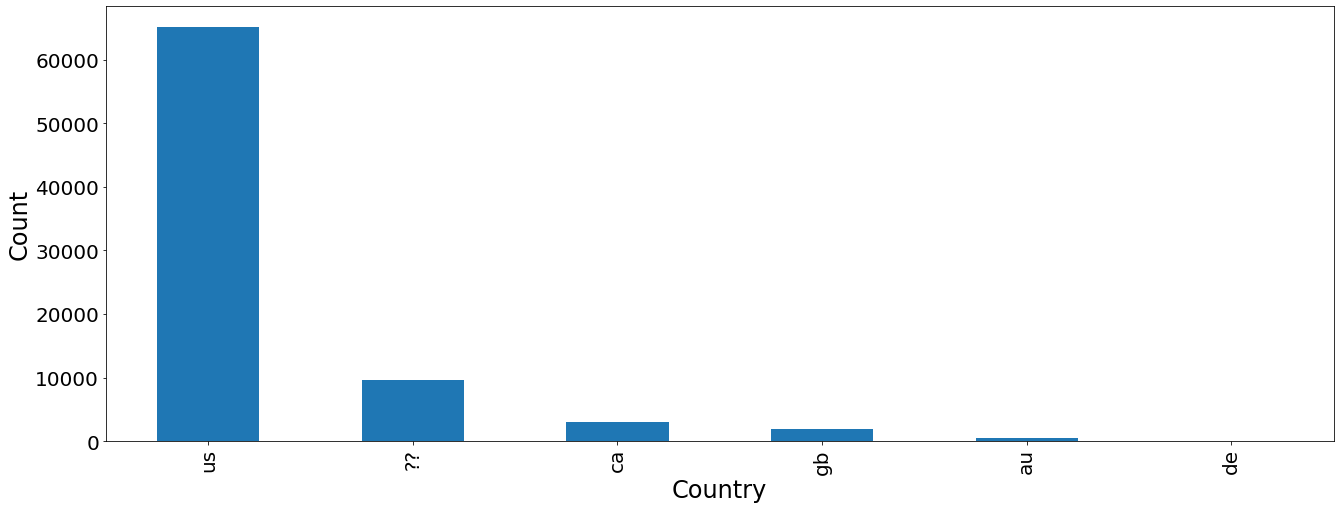

In [82]:
plt.subplots(figsize=(22,8))
ufo_df["country"].value_counts().plot.bar()

plt.xlabel("Country", fontsize=24)
plt.xticks(fontsize=20)
plt.ylabel("Count", fontsize=24)
plt.yticks(fontsize=20)

plt.show()

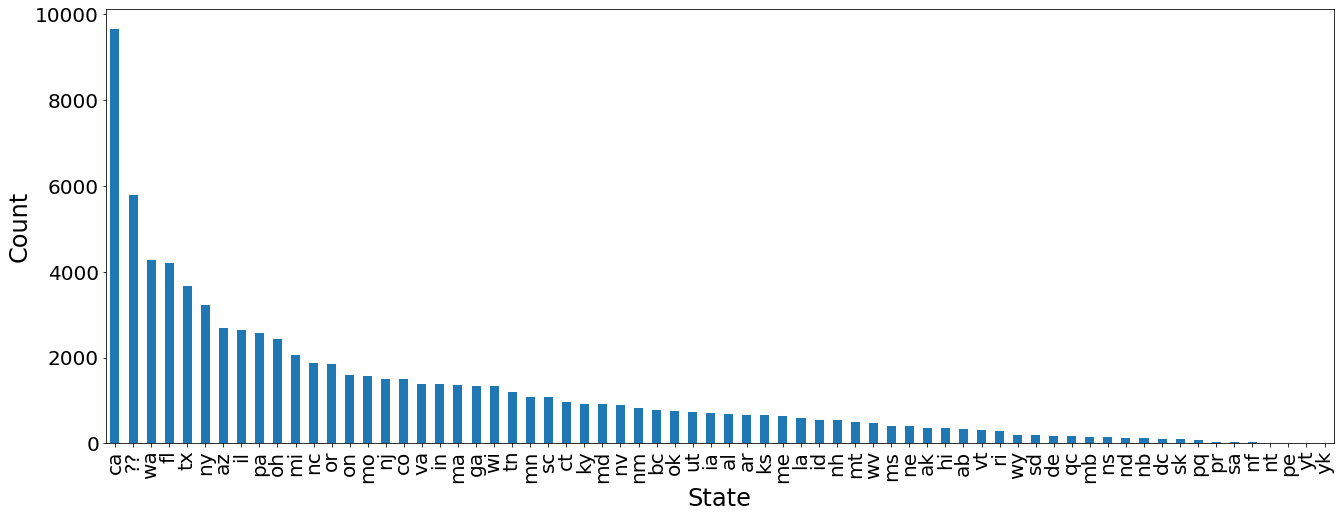

In [81]:
plt.subplots(figsize=(22,8))
ufo_df["state"].value_counts().plot.bar()

plt.xlabel("State", fontsize=24)
plt.xticks(fontsize=20)
plt.ylabel("Count", fontsize=24)
plt.yticks(fontsize=20)

plt.show()

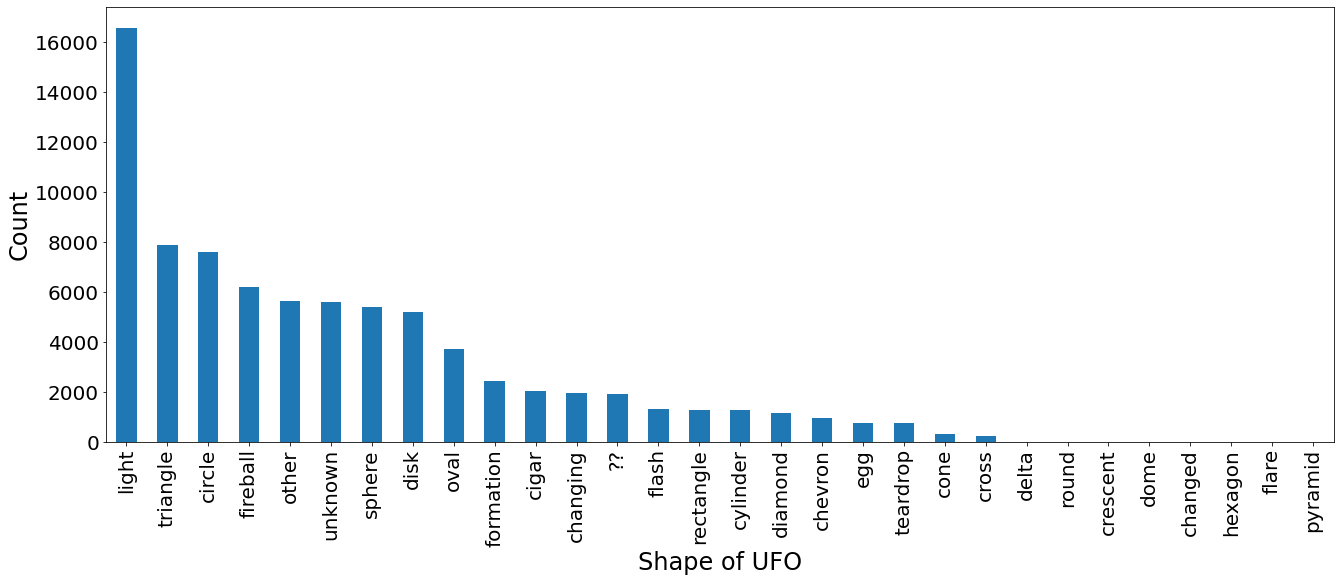

In [80]:
plt.subplots(figsize=(22,8))
ufo_df["shape"].value_counts().plot.bar()

plt.xlabel("Shape of UFO", fontsize=24)
plt.xticks(fontsize=20)
plt.ylabel("Count", fontsize=24)
plt.yticks(fontsize=20)

plt.show()

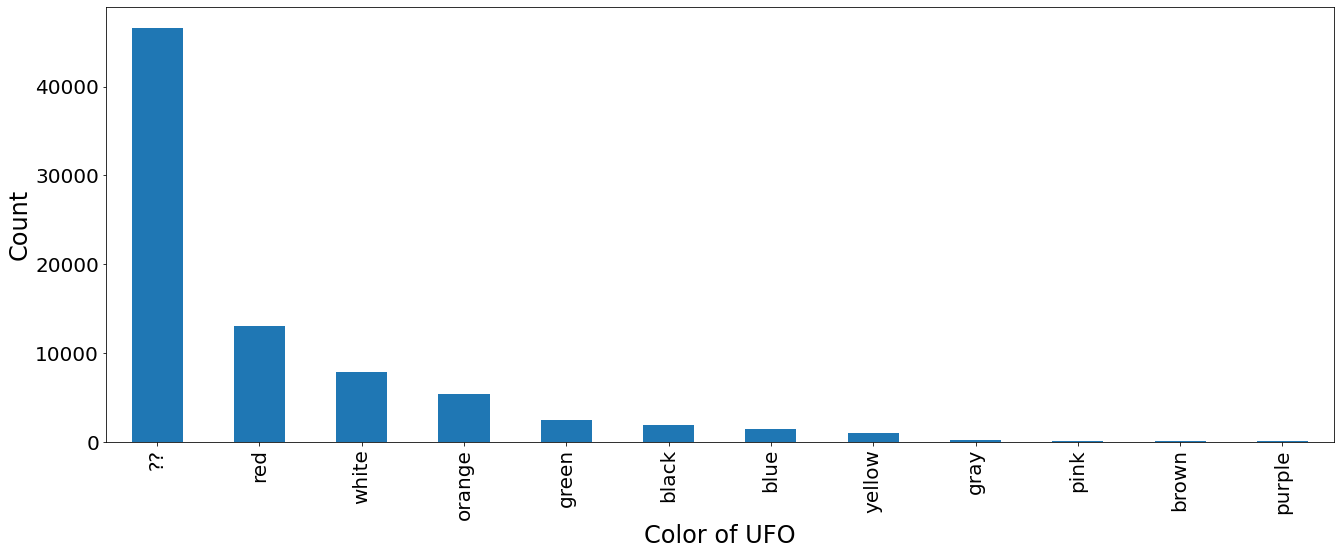

In [79]:
plt.subplots(figsize=(22,8))
ufo_df["ufo_color"].value_counts().plot.bar()

plt.xlabel("Color of UFO", fontsize=24)
plt.xticks(fontsize=20)
plt.ylabel("Count", fontsize=24)
plt.yticks(fontsize=20)

plt.show()

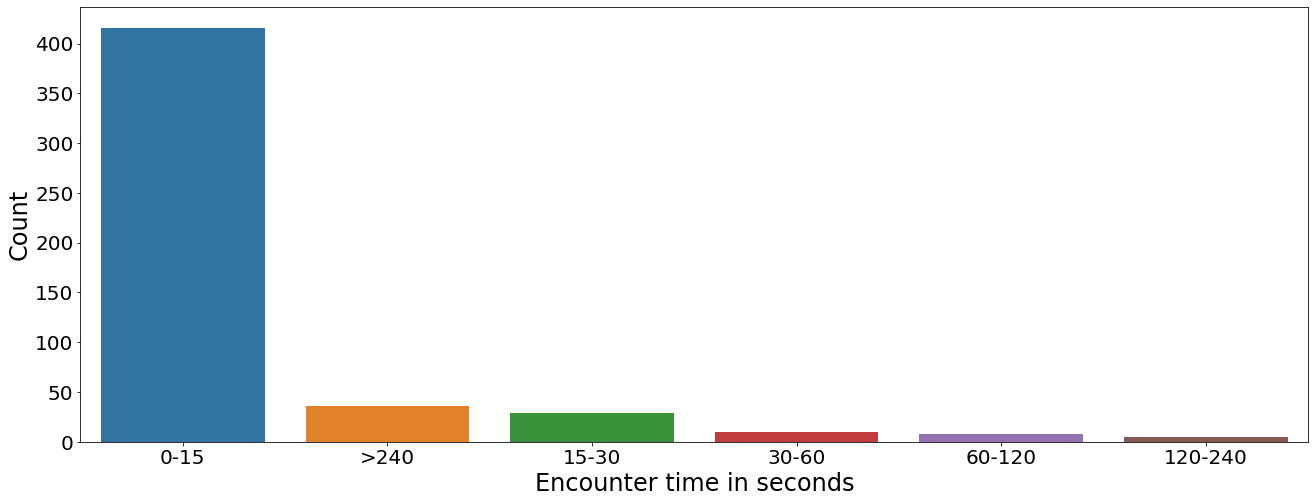

In [62]:
plt.subplots(figsize=(22,8))
duration_sec = [i for i in ufo_df["duration_seconds"].value_counts()]
duration_sec_list = []
for i in duration_sec:
    if i in range(0,16):
        duration_sec_list.append("0-15")
    if i in range(15,31):
        duration_sec_list.append("15-30")
    if i in range(31,61):
        duration_sec_list.append("30-60")
    if i in range(60,121):
        duration_sec_list.append("60-120")
    if i in range(120,241):
        duration_sec_list.append("120-240")
    if i > 240:
        duration_sec_list.append(">240")
        
duration_sec_list = pd.Series(duration_sec_list)
di = duration_sec_list.value_counts().index
dv = duration_sec_list.value_counts().values
sns.barplot(x=di,y=dv)

plt.xlabel("Encounter time in seconds",fontsize=24)
plt.xticks(fontsize=20)
plt.ylabel("Count",fontsize=24)
plt.yticks(fontsize=20)

plt.show()